<a href="https://colab.research.google.com/github/sona2004ss/Titaniccc/blob/main/MOVIE_RATING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

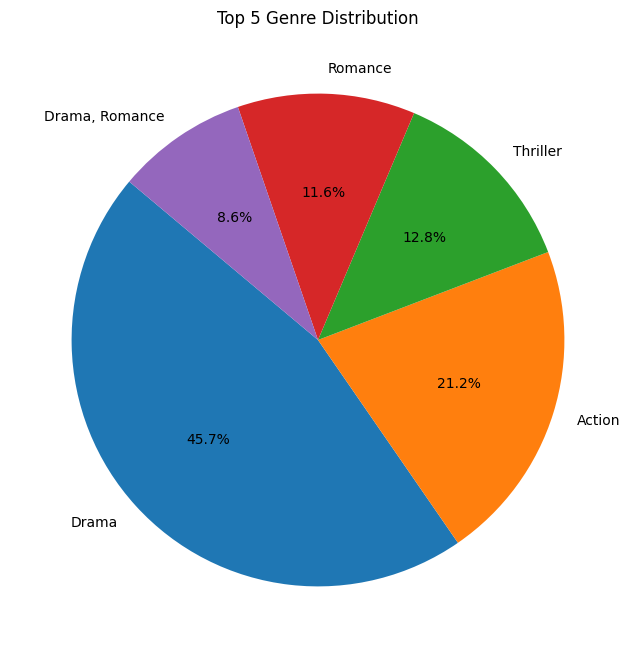

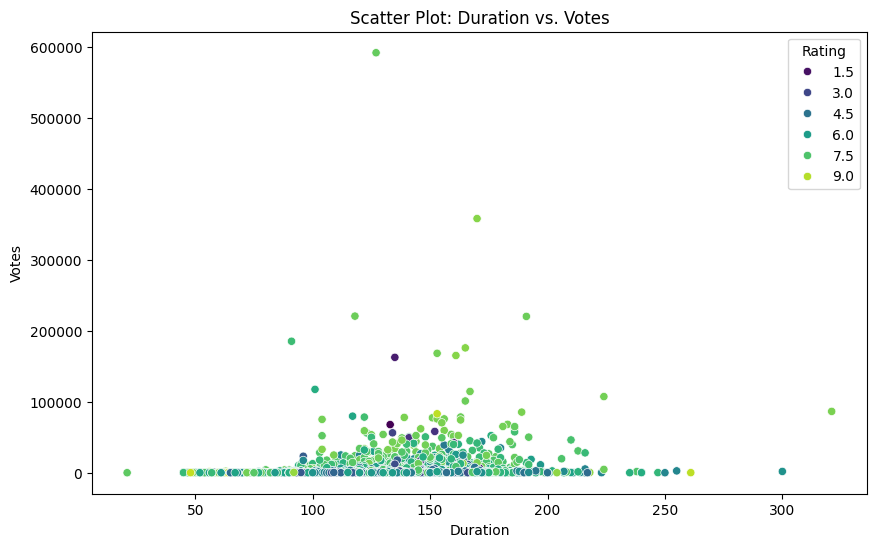

<ipython-input-2-85ffd8045980>:68: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(movies_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


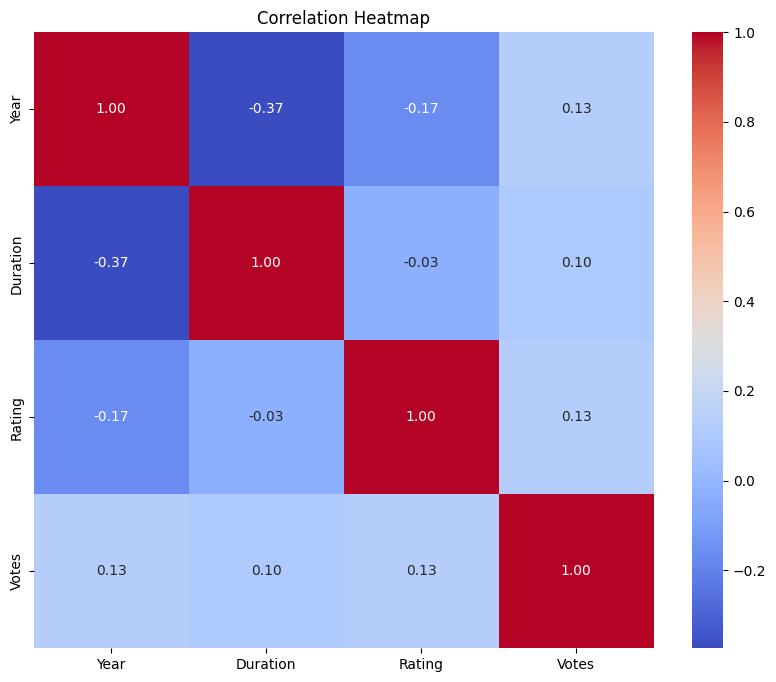

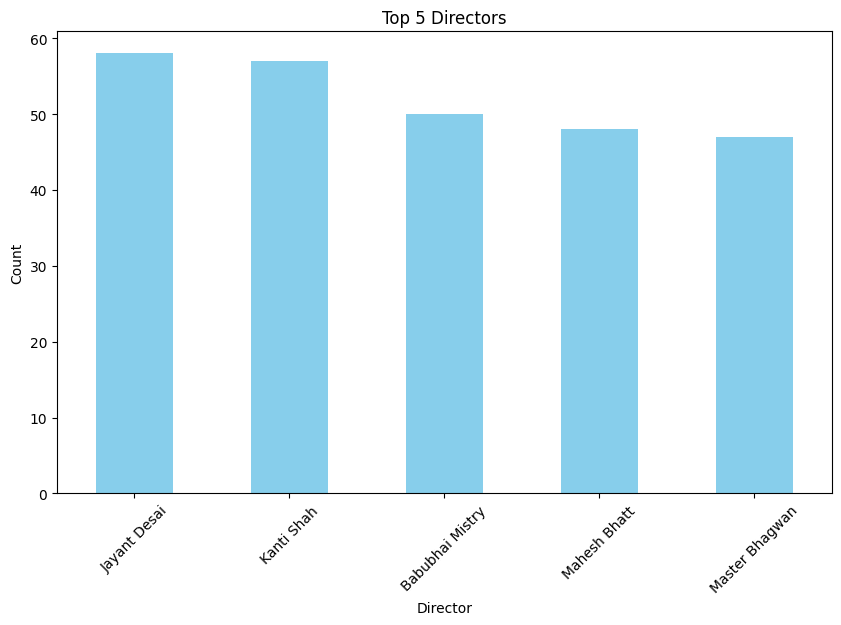

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

url = '/content/IMDb Movies India.csv'
movies_data = pd.read_csv(url, encoding='ISO-8859-1')
print(movies_data.head())

movies_data['Year'] = movies_data['Year'].str.extract('(\d+)').astype(float)
movies_data['Duration'] = movies_data['Duration'].str.extract('(\d+)').astype(float)
movies_data['Votes'] = pd.to_numeric(movies_data['Votes'].replace('[^\d.]', '', regex=True), errors='coerce')

X = movies_data[['Year', 'Duration', 'Votes', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = movies_data['Rating']
y_imputer = SimpleImputer(strategy='mean')
y = y_imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['Year', 'Duration', 'Votes']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

top_genres = movies_data['Genre'].value_counts().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Genre Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Votes', data=movies_data, hue='Rating', palette='viridis')
plt.title('Scatter Plot: Duration vs. Votes')
plt.xlabel('Duration')
plt.ylabel('Votes')
plt.legend(title='Rating', loc='upper right')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(movies_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

top_directors = movies_data['Director'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top 5 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
